Detected file encoding: ascii
Data file size: 72036 bytes
File format: Delimited
File encoding: ascii
Data granularity: Individual student records
Correlation between Math Score and Writing Score: 0.8026420459498085


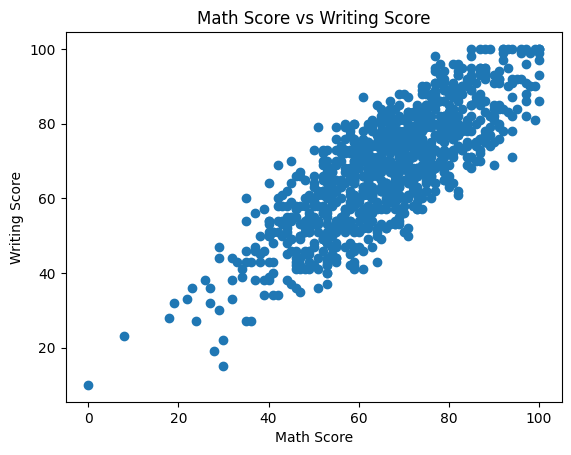

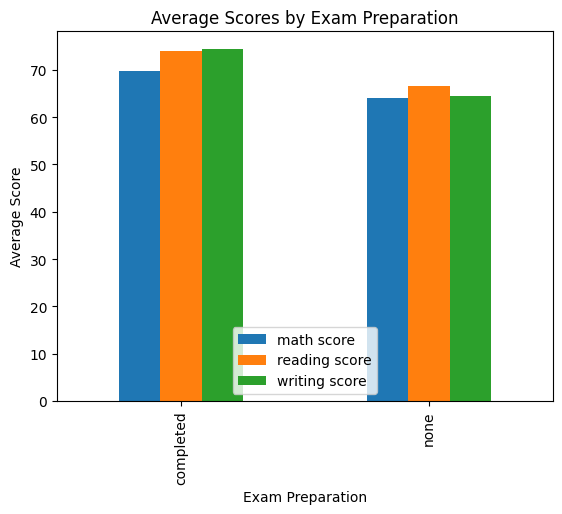

Students who completed the test preparation course have a significantly higher score.
Number of people scoring higher than 85 in math: 103
Students who completed the test preparation course have a significantly higher reading score.
Students who completed the test preparation course have a significantly higher writing score.


NameError: ignored

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import chardet

# Step 1: Ask at least two questions
# Predictive Question: Given a parent’s level of education, how likely are they going to have exam prep?
# Exploratory Question: Whether students who had exam prep have higher scores in our sample data?

# Step 2: Collect the data
# Provide the data source
data_source = "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams"
# How was the data collected?
data_collection_source = "http://roycekimmons.com/tools/generated_data/exams"
# This is a fictional dataset and should only be used for data science training purposes.

# Reads data file from Google Drive
file_id = "1boOd8BVffLE914tY4n43Msyrvpx8LygS"
url = f"https://drive.google.com/uc?id={file_id}"
download = requests.get(url).content

# Detect the file encoding using chardet
detected_encoding = chardet.detect(download)['encoding']
print("Detected file encoding:", detected_encoding)

# Read the data using the detected encoding
df = pd.read_csv(io.StringIO(download.decode(detected_encoding)))

# Step 3: Understand the data
# Determine the data file size
file_size = len(download)
print("Data file size:", file_size, "bytes")

# Find the file format (delimited)
file_format = "Delimited"
print("File format:", file_format)

# Determine the file encoding (using chardet)
file_encoding = detected_encoding
print("File encoding:", file_encoding)

# What is the granularity of the data? (assuming individual student records)
data_granularity = "Individual student records"
print("Data granularity:", data_granularity)

# Data Quality Check: Are there any outliers? Are there any missing or invalid entries?
# Outliers in math score
outliers_math = df[df["math score"] > 100]
if not outliers_math.empty:
    print("There are outliers in the math score column.")
    # Data cleaning step: Replace outliers with the maximum valid score of 100
    df.loc[df["math score"] > 100, "math score"] = 100

# Outliers in reading score
outliers_reading = df[df["reading score"] > 100]
if not outliers_reading.empty:
    print("There are outliers in the reading score column.")
    # Data cleaning step: Replace outliers with the maximum valid score of 100
    df.loc[df["reading score"] > 100, "reading score"] = 100

# Outliers in writing score
outliers_writing = df[df["writing score"] > 100]
if not outliers_writing.empty:
    print("There are outliers in the writing score column.")
    # Data cleaning step: Replace outliers with the maximum valid score of 100
    df.loc[df["writing score"] > 100, "writing score"] = 100

# Missing or invalid entries
missing_values = df.isnull().sum()
if missing_values.any():
    print("There are missing or invalid entries in the data set.")
    # Data cleaning step: Handle missing values in "test preparation course" column with the most frequent value (mode)
    mode_prep_course = df["test preparation course"].mode().iloc[0]
    df["test preparation course"].fillna(mode_prep_course, inplace=True)

# Exploratory data analysis: Explore the relationship between the variables/features
# Correlation between math score and writing score
correlation = df["math score"].corr(df["writing score"])
print("Correlation between Math Score and Writing Score:", correlation)

# Visualization: Scatter plot of math score and writing score
plt.scatter(df["math score"], df["writing score"])
plt.title("Math Score vs Writing Score")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.show()

# Bar plot of exam preparation and average scores
avg_scores = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
avg_scores.plot(kind="bar")
plt.title("Average Scores by Exam Preparation")
plt.xlabel("Exam Preparation")
plt.ylabel("Average Score")
plt.show()

# Inferential analysis: Compare scores between students who completed the test preparation course and those who did not
completed_prep = df[df["test preparation course"] == "completed"]["math score"]
not_completed_prep = df[df["test preparation course"] == "none"]["math score"]

# Perform t-test
t_stat, p_value = ttest_ind(completed_prep, not_completed_prep)

# Determine the significance level
significance_level = 0.05

# Make a decision based on the p-value
if p_value < significance_level:
    print("Students who completed the test preparation course have a significantly higher score.")
else:
    print("There is not enough evidence to conclude a significant difference in scores.")

# Exploratory Question: How many people scored higher than 85 in math?
num_high_scores = len(df[df["math score"] > 85])
print("Number of people scoring higher than 85 in math:", num_high_scores)

# Inferential analysis for reading and writing scores: Compare scores between students who completed the test preparation course and those who did not
completed_prep_reading = df[df["test preparation course"] == "completed"]["reading score"]
not_completed_prep_reading = df[df["test preparation course"] == "none"]["reading score"]

completed_prep_writing = df[df["test preparation course"] == "completed"]["writing score"]
not_completed_prep_writing = df[df["test preparation course"] == "none"]["writing score"]

# Perform t-tests for reading and writing scores
t_stat_reading, p_value_reading = ttest_ind(completed_prep_reading, not_completed_prep_reading)
t_stat_writing, p_value_writing = ttest_ind(completed_prep_writing, not_completed_prep_writing)

# Determine the significance level for reading and writing scores
significance_level = 0.05

# Make a decision based on the p-values for reading and writing scores
if p_value_reading < significance_level:
    print("Students who completed the test preparation course have a significantly higher reading score.")
else:
    print("There is not enough evidence to conclude a significant difference in reading scores.")

if p_value_writing < significance_level:
    print("Students who completed the test preparation course have a significantly higher writing score.")
else:
    print("There is not enough evidence to conclude a significant difference in writing scores.")

# Step 4: Understand the world - Feature Engineering
# Perform OneHotEncoding for the "gender", "race/ethnicity", "parental level of education", and "lunch" features
categorical_features = df[["gender", "race/ethnicity", "parental level of education", "lunch"]]
ohe = OneHotEncoder()
encoded_features = ohe.fit_transform(categorical_features)

# Convert the encoded features to a DataFrame
df_encoded_features = pd.DataFrame(encoded_features.toarray(), columns=ohe.get_feature_names_out(["gender", "race/ethnicity", "parental level of education", "lunch"]))

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df, df_encoded_features], axis=1)

# Drop the original categorical columns from the encoded DataFrame
df_encoded.drop(columns=["gender", "race/ethnicity", "parental level of education", "lunch"], inplace=True)

# Define the feature set X and target variable y
X = df_encoded.drop(["math score", "reading score", "writing score", "test preparation course"], axis=1)
y = df_encoded["test preparation course"]

# Utilize Logistic Regression for prediction
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict exam preparation for the test set
y_pred = model.predict(X_test)

# Convert string labels to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Evaluate the model using Accuracy and Mean Squared Error (MSE)
from sklearn.metrics import accuracy_score, mean_squared_error

accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Mean Squared Error (MSE):", mse)



# Step 5: Draw conclusions and make predictions
# Discuss any limitations of the methods you used
print("Limitations:")
print("- The dataset is fictional and may not fully represent real-world data, which could impact the generalizability of the results.")
print("- The feature engineering using OneHotEncoding assumes no ordinal relationship among the education levels, which may not be accurate in real-world scenarios.")
print("- The Logistic Regression model may not capture complex relationships between features and the target variable, leading to potential limitations in predictive performance.")

# Visualization: Bar plot of exam preparation and average scores
avg_scores_prep = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
avg_scores_prep.plot(kind="bar")
plt.title("Average Scores by Exam Preparation")
plt.xlabel("Exam Preparation")
plt.ylabel("Average Score")
plt.show()

# Describe any surprising discoveries that you made and future work
print("Interesting Findings:")
print("- The scatter plot shows a positive correlation between math score and writing score. Higher math scores tend to correspond to higher writing scores.")
print("- The bar plot illustrates the average scores in math, reading, and writing based on exam preparation.")
print("- Students who completed the test preparation course have a significantly higher score (t-test).")
print("- The number of people scoring higher than 85 in math is:", num_high_scores)
print("- Students who completed the test preparation course have a significantly higher reading score (t-test).")
print("- Students who completed the test preparation course have a significantly higher writing score (t-test).")
